In [1]:
################################  GOOGLE MOUNT #############################

from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


In [2]:
import pytz
from datetime import datetime
# assuming now contains a timezone aware datetime
now = datetime.now()
tz = pytz.timezone('Asia/Kolkata')
your_now = now.astimezone(tz)
print (your_now)

2020-05-11 00:03:06.522131+05:30


In [3]:
################################ IMPORTING LIBRARIES ############################

!pip install plotly_express

import numpy as np # linear algebra
import seaborn as sns
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

import pandas
import matplotlib.pyplot as plt
%matplotlib inline


import os
os.chdir('/gdrive/My Drive/Hackathon/GREATLEARNING-APRIL/')

!pip install researchpy

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
!ls -lrt

total 29501
-rw------- 1 root root   195027 Apr 21 05:22 sample_submission.csv
-rw------- 1 root root 29993298 Apr 26 17:58 data_train_int.csv
drwx------ 2 root root     4096 Apr 27 02:32 MyFiles
drwx------ 2 root root     4096 Apr 28 08:00 RawData
drwx------ 2 root root     4096 Apr 28 08:00 FeatureEngineering
drwx------ 2 root root     4096 Apr 28 08:01 FeatureSelection
drwx------ 2 root root     4096 Apr 29 14:22 FeatureAlgo


In [0]:
metrics = pd.DataFrame()

In [0]:
fund_ratios=pd.read_csv('/gdrive/My Drive/Hackathon/GREATLEARNING-APRIL/RawData/fund_ratios.csv')
primary_keys_df = fund_ratios[['fund_id','tag']].copy(deep=True)
primary_keys_df.to_csv('/gdrive/My Drive/Hackathon/GREATLEARNING-APRIL/FeatureEngineering/primary_keys_df.csv',index=False)

# **Memory reduction**

Sometimes the type encoding of a column is not the best choice, as for example encoding in int32 a column containing only value from 0 to 10. One of the most popular function used a function to reduce the memory usage by converting the type of column to the best type as possible.

In [0]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.
    """
    start_mem = df.memory_usage().sum() / 1024 ** 2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024 ** 2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

    return df

In [0]:
#####################################################################################################################################################

In [9]:
#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

import numpy as np # linear algebra
import seaborn as sns
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import pandas
import matplotlib.pyplot as plt
%matplotlib inline
! pip install plotly_express
import plotly_express as px

# Any results you write to the current directory are saved as output.

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import average_precision_score

import io
from datetime import datetime
import time

#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn.metrics import accuracy_score , roc_auc_score , f1_score, precision_score , average_precision_score , recall_score


import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier , OneVsOneClassifier 
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score, cross_val_predict , LeaveOneOut , ShuffleSplit,RandomizedSearchCV

In [0]:
name = ['LR','NB','KNN','SVC', 'CART', 'RF', 'ADA', 'BAG','GradBoost', 'NB_ber','MLPC','XGB']
algo_name = ['LogisticRegression()',              
             'naive_bayes.GaussianNB()', 
             'KNeighborsClassifier()', 
             'SVC()',
             'DecisionTreeClassifier()',
             'RandomForestClassifier()', 
             'ensemble.AdaBoostClassifier()',
             'ensemble.BaggingClassifier()', 
             'ensemble.GradientBoostingClassifier()', 
             'naive_bayes.BernoulliNB()',
             'MLPClassifier(hidden_layer_sizes = [100]*5)',
             'XGBClassifier()'
             ]
algo_name_tbl = pd.concat([pd.DataFrame(name,columns=['name']),pd.DataFrame(algo_name,columns=['algo_name'])],axis=1)

algo_name_tbl

algo_COL = ['name']
ALGO_SCORE = pd.DataFrame(columns = algo_COL)

In [0]:
import os
os.chdir('/gdrive/My Drive/Hackathon/GREATLEARNING-APRIL/RawData/')

In [12]:
!ls 

bond_ratings.csv      fund_ratios.csv  return_10year.csv
fund_allocations.csv  fund_specs.csv   return_3year.csv
fund_config.csv       other_specs.csv  return_5year.csv


In [0]:
##### Reading the files

bond_ratings = pd.read_csv('/gdrive/My Drive/Hackathon/GREATLEARNING-APRIL/RawData/bond_ratings.csv')#
fund_allocations = pd.read_csv('/gdrive/My Drive/Hackathon/GREATLEARNING-APRIL/RawData/fund_allocations.csv')#
fund_config = pd.read_csv('/gdrive/My Drive/Hackathon/GREATLEARNING-APRIL/RawData/fund_config.csv')#
fund_ratios = pd.read_csv('/gdrive/My Drive/Hackathon/GREATLEARNING-APRIL/RawData/fund_ratios.csv')#
fund_specs = pd.read_csv('/gdrive/My Drive/Hackathon/GREATLEARNING-APRIL/RawData/fund_specs.csv')#
other_specs = pd.read_csv('/gdrive/My Drive/Hackathon/GREATLEARNING-APRIL/RawData/other_specs.csv')#
return_10year = pd.read_csv('/gdrive/My Drive/Hackathon/GREATLEARNING-APRIL/RawData/return_10year.csv')#
return_3year = pd.read_csv('/gdrive/My Drive/Hackathon/GREATLEARNING-APRIL/RawData/return_3year.csv')#
return_5year = pd.read_csv('/gdrive/My Drive/Hackathon/GREATLEARNING-APRIL/RawData/return_5year.csv')#


In [14]:
df = pd.merge(primary_keys_df,fund_config,how='left',on='fund_id')
df.sample(3)

,fund_id,tag,category,parent_company,fund_name
8205,5ea01573-db9d-4e67-9b97-7f43048891e0,33893,Foreign Large Growth,Alger,Alger International Focus Fund Class C
11608,6086a568-1f33-4c07-ace0-2ab8eef1bf00,149678,Foreign Large Blend,BNY Mellon Funds,BNY Mellon International Appreciation Fund Inv...
20219,e5f86864-7213-440e-a598-1a023140b064,154790,Emerging Markets Bond,MainStay,MainStay MacKay Emerging Markets Debt Fund Cla...


In [15]:
print(return_10year.columns)

Index(['10years_category_r_squared', '10yrs_sharpe_ratio_fund',
       '10_years_alpha_fund', '10years_fund_r_squared', '10years_fund_std',
       '10yrs_sharpe_ratio_category', '10_years_beta_fund',
       '10yrs_treynor_ratio_fund', 'fund_id',
       '10_years_return_mean_annual_category', '10yrs_treynor_ratio_category',
       '10_years_return_fund', '10_years_alpha_category',
       '10_years_beta_category', '10years_category_std',
       '10_years_return_mean_annual_fund', '10_years_return_category'],
      dtype='object')


In [0]:
#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@  JOINING THE DATA @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

df_fund_ratios = pd.merge(df.drop(columns=['fund_id']),    fund_ratios,       how='inner', on='tag')
df_return_10year = pd.merge(df_fund_ratios, return_10year,     how='inner', on='fund_id')
df_bond_ratings = pd.merge(df_return_10year, bond_ratings,      how='inner', on='tag')
df_fund_allocations = pd.merge(df_bond_ratings, fund_allocations,  how='inner', left_on='tag', right_on='id')
df_fund_specs = pd.merge(df_fund_allocations, fund_specs,        how='inner', on='tag')
df_return_3year = pd.merge(df_fund_specs, return_3year,        how='inner', on='tag')
df_return_5year = pd.merge(df_return_3year, return_5year,        how='inner', on='tag')
data = pd.merge(df_return_5year, other_specs.drop(columns=['fund_return_3years',
                         'greatstone_rating', 'mmc', 'pb_ratio', 'pc_ratio', 'pe_ratio', 'ps_ratio'],axis=1),        how='inner', on='tag')

In [17]:
data.shape

(25000, 125)

In [0]:
data_bkp = data.copy(deep=True)

In [19]:
data['inception_date'] = data.inception_date.apply(lambda x: pd.to_datetime(x).strftime('%m/%d/%Y'))
data['inception_date'] = data['inception_date'].astype('object')
data['inception_date'] = data['inception_date'].astype(np.datetime64)
data.set_index('inception_date',inplace=True)
# Add columns with year, month, and weekday name
data['Day'] = data.index.day.astype('int64')
data['Year'] = data.index.year.astype('int64')
data['Month'] = data.index.month.astype('int64')
data['Weekday_Name'] = data.index.weekday .astype('int64')

data['Week_of_Year'] = data.index.week.astype('int64')
data['is_year_start'] = data.index.is_year_start.astype('int64')

data['is_year_end'] = data.index.is_year_end.astype('int64')
data['is_month_start'] = data.index.is_month_start.astype('int64')

data['is_month_end'] = data.index.is_month_end.astype('int64')
data['is_quarter_start'] = data.index.is_quarter_start.astype('int64')


data['is_quarter_end'] = data.index.is_quarter_end.astype('int64')
data['is_leap_year'] = data.index.is_leap_year.astype('int64')#

data.reset_index(drop=True, inplace=True) 

data.shape

(25000, 136)

In [0]:
data.to_csv('/gdrive/My Drive/Hackathon/GREATLEARNING-APRIL/FeatureEngineering/data_joined.csv',index=False)

In [21]:
### Finding the number of *****UNIQUE****** values and dropping columns and rows having same unique values
i=0
col_d = list(data.columns)
for i in range(len(col_d)):
  ## droping column wise
  unq = data[col_d[i]].nunique()
  if unq ==1:
    data.drop(columns=col_d[i],axis=1,inplace=True)   
    print("number unique values in column ,",col_d[i] ," are:-  ",unq)


i=0
row_d = data.shape[0]
for i in range(row_d):
  ## droping row wise
  unq = data.iloc[i,:].nunique()
  if unq == 1:
    data.drop(data.index[i],axis=0,inplace=True)
    print("number unique values in row index ,",i ," are:-  ",unq)


number unique values in column , us_govt_bond_rating  are:-   1
number unique values in column , currency  are:-   1


In [22]:
data.shape

(25000, 134)

In [0]:
### Finding the columns having  ***** NULL ****** values gretaer than the threshold and drop then column and row wise
threshold = 0.7
i=0
col_d = list(data.columns)
for i in range(len(col_d)):
  ## droping column wise
  unq = data[col_d[i]].isnull().sum()/data.shape[0]
  if unq > threshold:
    data.drop(columns=col_d[i],axis=1,inplace=True)   
    print("number unique values in column ,",col_d[i] ," are:-  ",unq)


i=0
row_d = data.shape[0]
for i in range(row_d):
  ## droping row wise
  unq = data.iloc[i,:].isnull().sum()/data.shape[0]
  if unq > threshold:
    data.drop(data.index[i],axis=0,inplace=True)
    print("% unique values in row index ,",i ," are:-  ",unq)


In [24]:
data.shape

(25000, 134)

In [25]:
################## CHECKING and Removing THE highly   ***** CORRELATED COLUMNS ******  ###################################################
correlated_features = set()
correlation_matrix = data.drop(columns=['tag','id','fund_id','greatstone_rating'],axis=1).corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

print(len(correlated_features))
print(correlated_features)

data.drop(columns=correlated_features,axis=1,inplace=True)

print(data.shape)

43
{'fund_return_3years', '3years_category_r_squared', '10_years_alpha_category', '5_years_beta_category', '2018_return_fund', '5_years_return_fund', '3years_fund_r_squared', '3years_category_std', '3_years_return_mean_annual_category', '10_years_return_mean_annual_fund', '10_years_return_category', 'ytd_return_category', '2010_return_category', 'category_r_squared_5years', '5years_fund_std', 'ytd_return_fund', 'Year', '2012_fund_return', '5years_category_std', '2017_return_fund', '2013_category_return', '5_years_alpha_category', '3_years_return_category', '5_years_beta_fund', '2014_return_fund', '3_years_return_mean_annual_fund', '5years_fund_r_squared', 'b_rating', '10years_fund_r_squared', '2011_return_fund', 'Week_of_Year', '10years_category_std', 'bond_percentage_of_porfolio', 'stock_percent_of_portfolio', 'fund_return_3months', '5_years_alpha_fund', '3_months_return_category', '2016_return_category', '5_years_return_category', '2013_return_fund', '5_years_return_mean_annual_fund'

In [26]:
data.head(4)

,tag,category,parent_company,fund_name,fund_id,fund_ratio_net_annual_expense,pb_ratio,ps_ratio,mmc,pc_ratio,pe_ratio,10years_category_r_squared,10yrs_sharpe_ratio_fund,10_years_alpha_fund,10years_fund_std,10yrs_sharpe_ratio_category,10_years_beta_fund,10yrs_treynor_ratio_fund,10_years_return_mean_annual_category,10yrs_treynor_ratio_category,10_years_return_fund,10_years_beta_category,bb_rating,below_b_rating,others_rating,maturity_bond,a_rating,aaa_rating,aa_rating,bbb_rating,duration_bond,portfolio_communication_allocation,portfolio_financial_services,portfolio_industrials_allocation,portfolio_tech_allocation,portfolio_materials_basic_allocation,portfolio_energy_allocation,portfolio_consumer_defence_allocation,portfolio_healthcare_allocation,portfolio_property_allocation,...,3yrs_treynor_ratio_category,fund_beta_3years,category_beta_3years,3_years_alpha_category,3yrs_sharpe_ratio_category,5yrs_sharpe_ratio_fund,5yrs_sharpe_ratio_category,5yrs_treynor_ratio_fund,5_years_return_mean_annual_category,5yrs_treynor_ratio_category,2014_category_return,2012_return_category,years_up,2018_return_category,category_return_1year,cash_percent_of_portfolio,2011_return_category,years_down,category_return_1month,2017_category_return,1_year_return_fund,2015_return_fund,portfolio_convertable,portfolio_others,2016_return_fund,2010_return_fund,category_ratio_net_annual_expense,category_return_2015,1_month_fund_return,portfolio_preferred,Day,Month,Weekday_Name,is_year_start,is_year_end,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_leap_year
0,67922,Energy Limited Partnership,DWS,DWS RREEF MLP & Energy Infrastructure Fund - C...,264614c6-5ac3-4146-ba26-1674b136cb40,1.44,1.71,1.31,"19,857.41",5.91,14.51,0.49,NaN,NaN,NaN,0.01,NaN,NaN,0.01,0.21,0.00,0.01,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.00,0.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,...,0.05,1.20,0.01,-0.04,0.00,NaN,0.00,NaN,0.00,-0.04,NaN,NaN,1.0,-16.32,13.05,1.19,NaN,2.0,4.20,-5.78,18.40,NaN,0.0,0.00,16.14,NaN,1.75,-34.98,4.12,0.00,2,2,0,0,0,0,0,0,0,0
1,134783,Large Growth,Janus Henderson,Janus Henderson Research Fund Class N,f5ad58c2-fdea-4087-8678-e04744f89f90,0.58,5.30,3.38,"72,347.03",15.95,18.88,0.88,1.16,0.16,14.30,0.01,1.08,15.57,0.01,0.15,17.25,0.01,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.78,9.77,9.97,35.51,2.86,0.38,5.88,14.41,2.67,...,0.13,1.07,0.01,0.01,0.01,0.89,0.01,10.37,0.01,0.10,10.00,15.34,5.0,-2.09,10.71,0.10,NaN,1.0,2.12,27.67,12.18,5.60,0.0,0.00,1.64,NaN,1.06,3.60,2.33,0.00,30,5,2,0,0,0,0,0,0,1
2,61271,Large Growth,Calvert Research and Management,Calvert Equity Fund Class A,3c13f4ab-02c4-4ca7-a133-7e996ec5d0c4,0.99,5.40,3.67,"68,857.43",15.97,23.27,0.88,1.22,1.00,12.68,0.01,0.95,16.58,0.01,0.15,16.21,0.01,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,4.70,16.40,11.45,25.09,8.36,0.00,9.42,16.47,1.03,...,0.13,0.85,0.01,0.01,0.01,1.15,0.01,13.84,0.01,0.10,10.00,15.34,26.0,-2.09,10.71,2.00,-2.46,5.0,2.12,27.67,19.77,3.68,0.0,0.22,2.32,17.23,1.06,3.60,3.77,0.08,23,8,6,0,0,0,0,0,0,0
3,64412,Large Value,Invesco,Invesco Diversified Dividend Fund R5 Class,ff78bdd8-59eb-4cef-9f3c-b1baacce9554,0.52,2.23,1.63,"43,266.62",8.93,12.7,0.90,1.20,0.75,11.21,0.01,0.84,16.38,0.01,0.14,14.12,0.01,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,6.53,13.80,10.91,0.16,2.22,6.79,25.73,9.00,0.00,...,0.09,0.70,0.01,-0.02,0.01,0.77,0.01,9.3,0.01,0.07,10.21,14.57,11.0,-8.53,4.48,6.13,-0.75,2.0,0.46,15.94,7.11,2.09,0.0,0.00,14.66,15.63,1.00,-4.05,1.46,0.00,24,10,0,0,0,0,0,0,0,0


In [27]:
data.shape

(25000, 91)

In [0]:
########### 

In [29]:
col_int = data.drop(columns=['tag','id','fund_id','greatstone_rating'],axis=1).select_dtypes(exclude=('category','object')).columns
col_id = ['tag','id','fund_id']
col_tgt = ['greatstone_rating']
col_cat = data.drop(columns=['tag','id','fund_id','greatstone_rating'],axis=1).select_dtypes(include=('category','object')).columns
print(len(col_int)+len(col_id)+len(col_tgt)+len(col_cat)),print(len(col_int),len(col_cat),len(col_id),len(col_tgt))

91
75 12 3 1


(None, None)

In [30]:
data[col_int].head(3)

,fund_ratio_net_annual_expense,pb_ratio,10years_category_r_squared,10yrs_sharpe_ratio_fund,10_years_alpha_fund,10years_fund_std,10yrs_sharpe_ratio_category,10_years_beta_fund,10_years_return_mean_annual_category,10yrs_treynor_ratio_category,10_years_return_fund,10_years_beta_category,bb_rating,below_b_rating,others_rating,maturity_bond,a_rating,aaa_rating,aa_rating,bbb_rating,duration_bond,portfolio_communication_allocation,portfolio_financial_services,portfolio_industrials_allocation,portfolio_tech_allocation,portfolio_materials_basic_allocation,portfolio_energy_allocation,portfolio_consumer_defence_allocation,portfolio_healthcare_allocation,portfolio_property_allocation,portfolio_utils_allocation,portfolio_cyclical_consumer_allocation,total_assets,yield,3_years_alpha_fund,3yrs_sharpe_ratio_fund,3yrs_treynor_ratio_category,fund_beta_3years,category_beta_3years,3_years_alpha_category,3yrs_sharpe_ratio_category,5yrs_sharpe_ratio_fund,5yrs_sharpe_ratio_category,5_years_return_mean_annual_category,5yrs_treynor_ratio_category,2014_category_return,2012_return_category,years_up,2018_return_category,category_return_1year,cash_percent_of_portfolio,2011_return_category,years_down,category_return_1month,2017_category_return,1_year_return_fund,2015_return_fund,portfolio_convertable,portfolio_others,2016_return_fund,2010_return_fund,category_ratio_net_annual_expense,category_return_2015,1_month_fund_return,portfolio_preferred,Day,Month,Weekday_Name,is_year_start,is_year_end,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_leap_year
0,1.44,1.71,0.49,NaN,NaN,NaN,0.01,NaN,0.01,0.21,0.00,0.01,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.00,0.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,0.00,0.00,1.185000e+07,5.57,-7.10,0.26,0.05,1.20,0.01,-0.04,0.00,NaN,0.00,0.00,-0.04,NaN,NaN,1.0,-16.32,13.05,1.19,NaN,2.0,4.20,-5.78,18.40,NaN,0.0,0.00,16.14,NaN,1.75,-34.98,4.12,0.00,2,2,0,0,0,0,0,0,0,0
1,0.58,5.30,0.88,1.16,0.16,14.30,0.01,1.08,0.01,0.15,17.25,0.01,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.78,9.77,9.97,35.51,2.86,0.38,5.88,14.41,2.67,0.39,17.38,1.397000e+10,0.42,0.07,1.06,0.13,1.07,0.01,0.01,0.01,0.89,0.01,0.01,0.10,10.0,15.34,5.0,-2.09,10.71,0.10,NaN,1.0,2.12,27.67,12.18,5.60,0.0,0.00,1.64,NaN,1.06,3.60,2.33,0.00,30,5,2,0,0,0,0,0,0,1
2,0.99,5.40,0.88,1.22,1.00,12.68,0.01,0.95,0.01,0.15,16.21,0.01,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,4.70,16.40,11.45,25.09,8.36,0.00,9.42,16.47,1.03,0.00,7.09,2.660000e+09,0.02,4.32,1.46,0.13,0.85,0.01,0.01,0.01,1.15,0.01,0.01,0.10,10.0,15.34,26.0,-2.09,10.71,2.00,-2.46,5.0,2.12,27.67,19.77,3.68,0.0,0.22,2.32,17.23,1.06,3.60,3.77,0.08,23,8,6,0,0,0,0,0,0,0


In [0]:
### Treating the  INT null values  

i=0
col_d = col_int
for i in range(len(col_d)):
  data[col_d[i]].fillna(np.mean(data[col_d[i]]),inplace=True)
  #unq = data_train[col_d[i]].isnull().sum()  
  #print("number of null values in column ,",col_d[i] ," are:-  ",unq)

In [32]:
data[col_int].head(3)

,fund_ratio_net_annual_expense,pb_ratio,10years_category_r_squared,10yrs_sharpe_ratio_fund,10_years_alpha_fund,10years_fund_std,10yrs_sharpe_ratio_category,10_years_beta_fund,10_years_return_mean_annual_category,10yrs_treynor_ratio_category,10_years_return_fund,10_years_beta_category,bb_rating,below_b_rating,others_rating,maturity_bond,a_rating,aaa_rating,aa_rating,bbb_rating,duration_bond,portfolio_communication_allocation,portfolio_financial_services,portfolio_industrials_allocation,portfolio_tech_allocation,portfolio_materials_basic_allocation,portfolio_energy_allocation,portfolio_consumer_defence_allocation,portfolio_healthcare_allocation,portfolio_property_allocation,portfolio_utils_allocation,portfolio_cyclical_consumer_allocation,total_assets,yield,3_years_alpha_fund,3yrs_sharpe_ratio_fund,3yrs_treynor_ratio_category,fund_beta_3years,category_beta_3years,3_years_alpha_category,3yrs_sharpe_ratio_category,5yrs_sharpe_ratio_fund,5yrs_sharpe_ratio_category,5_years_return_mean_annual_category,5yrs_treynor_ratio_category,2014_category_return,2012_return_category,years_up,2018_return_category,category_return_1year,cash_percent_of_portfolio,2011_return_category,years_down,category_return_1month,2017_category_return,1_year_return_fund,2015_return_fund,portfolio_convertable,portfolio_others,2016_return_fund,2010_return_fund,category_ratio_net_annual_expense,category_return_2015,1_month_fund_return,portfolio_preferred,Day,Month,Weekday_Name,is_year_start,is_year_end,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_leap_year
0,1.44,1.71,0.49,0.937495,-0.003148,11.418634,0.01,0.963222,0.01,0.21,0.00,0.01,0.0,0.0,0.0,7.765444,0.0,0.0,0.0,0.0,4.643082,0.00,0.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,0.00,0.00,1.185000e+07,5.57,-7.10,0.26,0.05,1.20,0.01,-0.04,0.00,0.517838,0.00,0.00,-0.04,4.677046,12.411046,1.0,-16.32,13.05,1.19,-1.864729,2.0,4.20,-5.78,18.40,-1.957244,0.0,0.00,16.14,13.603278,1.75,-34.98,4.12,0.00,2,2,0,0,0,0,0,0,0,0
1,0.58,5.30,0.88,1.160000,0.160000,14.300000,0.01,1.080000,0.01,0.15,17.25,0.01,0.0,0.0,0.0,7.765444,0.0,0.0,0.0,0.0,4.643082,0.78,9.77,9.97,35.51,2.86,0.38,5.88,14.41,2.67,0.39,17.38,1.397000e+10,0.42,0.07,1.06,0.13,1.07,0.01,0.01,0.01,0.890000,0.01,0.01,0.10,10.000000,15.340000,5.0,-2.09,10.71,0.10,-1.864729,1.0,2.12,27.67,12.18,5.600000,0.0,0.00,1.64,13.603278,1.06,3.60,2.33,0.00,30,5,2,0,0,0,0,0,0,1
2,0.99,5.40,0.88,1.220000,1.000000,12.680000,0.01,0.950000,0.01,0.15,16.21,0.01,0.0,0.0,0.0,7.765444,0.0,0.0,0.0,0.0,4.643082,4.70,16.40,11.45,25.09,8.36,0.00,9.42,16.47,1.03,0.00,7.09,2.660000e+09,0.02,4.32,1.46,0.13,0.85,0.01,0.01,0.01,1.150000,0.01,0.01,0.10,10.000000,15.340000,26.0,-2.09,10.71,2.00,-2.460000,5.0,2.12,27.67,19.77,3.680000,0.0,0.22,2.32,17.230000,1.06,3.60,3.77,0.08,23,8,6,0,0,0,0,0,0,0


In [33]:
data[col_int].isnull().sum().sum()

0

In [0]:
############################### NEGATIVE VALUES ###########################################################

### Treating the INT negative values  - Training 

i=0
col_d = col_int
i=0
column = []
for i in range(len(col_d)):
  data[col_d[i]]  = data[col_d[i]].apply(lambda x : x*-1 if x<0 else x)
  unq = data[col_d[i]].loc[(data[col_d[i]]<0)].count()
  #print("number negative values in column ,",col_d[i] ," are:-  ",unq)

In [35]:
data[col_int].head(3)

,fund_ratio_net_annual_expense,pb_ratio,10years_category_r_squared,10yrs_sharpe_ratio_fund,10_years_alpha_fund,10years_fund_std,10yrs_sharpe_ratio_category,10_years_beta_fund,10_years_return_mean_annual_category,10yrs_treynor_ratio_category,10_years_return_fund,10_years_beta_category,bb_rating,below_b_rating,others_rating,maturity_bond,a_rating,aaa_rating,aa_rating,bbb_rating,duration_bond,portfolio_communication_allocation,portfolio_financial_services,portfolio_industrials_allocation,portfolio_tech_allocation,portfolio_materials_basic_allocation,portfolio_energy_allocation,portfolio_consumer_defence_allocation,portfolio_healthcare_allocation,portfolio_property_allocation,portfolio_utils_allocation,portfolio_cyclical_consumer_allocation,total_assets,yield,3_years_alpha_fund,3yrs_sharpe_ratio_fund,3yrs_treynor_ratio_category,fund_beta_3years,category_beta_3years,3_years_alpha_category,3yrs_sharpe_ratio_category,5yrs_sharpe_ratio_fund,5yrs_sharpe_ratio_category,5_years_return_mean_annual_category,5yrs_treynor_ratio_category,2014_category_return,2012_return_category,years_up,2018_return_category,category_return_1year,cash_percent_of_portfolio,2011_return_category,years_down,category_return_1month,2017_category_return,1_year_return_fund,2015_return_fund,portfolio_convertable,portfolio_others,2016_return_fund,2010_return_fund,category_ratio_net_annual_expense,category_return_2015,1_month_fund_return,portfolio_preferred,Day,Month,Weekday_Name,is_year_start,is_year_end,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_leap_year
0,1.44,1.71,0.49,0.937495,0.003148,11.418634,0.01,0.963222,0.01,0.21,0.00,0.01,0.0,0.0,0.0,7.765444,0.0,0.0,0.0,0.0,4.643082,0.00,0.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,0.00,0.00,1.185000e+07,5.57,7.10,0.26,0.05,1.20,0.01,0.04,0.00,0.517838,0.00,0.00,0.04,4.677046,12.411046,1.0,16.32,13.05,1.19,1.864729,2.0,4.20,5.78,18.40,1.957244,0.0,0.00,16.14,13.603278,1.75,34.98,4.12,0.00,2,2,0,0,0,0,0,0,0,0
1,0.58,5.30,0.88,1.160000,0.160000,14.300000,0.01,1.080000,0.01,0.15,17.25,0.01,0.0,0.0,0.0,7.765444,0.0,0.0,0.0,0.0,4.643082,0.78,9.77,9.97,35.51,2.86,0.38,5.88,14.41,2.67,0.39,17.38,1.397000e+10,0.42,0.07,1.06,0.13,1.07,0.01,0.01,0.01,0.890000,0.01,0.01,0.10,10.000000,15.340000,5.0,2.09,10.71,0.10,1.864729,1.0,2.12,27.67,12.18,5.600000,0.0,0.00,1.64,13.603278,1.06,3.60,2.33,0.00,30,5,2,0,0,0,0,0,0,1
2,0.99,5.40,0.88,1.220000,1.000000,12.680000,0.01,0.950000,0.01,0.15,16.21,0.01,0.0,0.0,0.0,7.765444,0.0,0.0,0.0,0.0,4.643082,4.70,16.40,11.45,25.09,8.36,0.00,9.42,16.47,1.03,0.00,7.09,2.660000e+09,0.02,4.32,1.46,0.13,0.85,0.01,0.01,0.01,1.150000,0.01,0.01,0.10,10.000000,15.340000,26.0,2.09,10.71,2.00,2.460000,5.0,2.12,27.67,19.77,3.680000,0.0,0.22,2.32,17.230000,1.06,3.60,3.77,0.08,23,8,6,0,0,0,0,0,0,0


In [0]:
#$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$  working on the CATEGORICAL  columns $$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$

In [37]:
col_cat

Index(['category', 'parent_company', 'fund_name', 'ps_ratio', 'mmc',
       'pc_ratio', 'pe_ratio', '10yrs_treynor_ratio_fund', 'investment_class',
       'fund_size', '3yrs_treynor_ratio_fund', '5yrs_treynor_ratio_fund'],
      dtype='object')

In [38]:
data[col_cat].sample(3)

,category,parent_company,fund_name,ps_ratio,mmc,pc_ratio,pe_ratio,10yrs_treynor_ratio_fund,investment_class,fund_size,3yrs_treynor_ratio_fund,5yrs_treynor_ratio_fund
3422,Global Real Estate,Voya,Voya International Real Estate Fund Class C,4,"5,902.77",6.46,11.89,8.9,Blend,Medium,4.62,3.41
6350,Small Value,Nationwide,Nationwide U.S. Small Cap Value Fund Class A,0.63,"2,180.18",5.05,12.07,10.54,Value,Small,4.65,2.08
9876,Small Blend,State Street Global Advisors,State Street Small/Mid Cap Equity Index Portfolio,1.3,"4,541.46",7.33,17.11,NaN,Growth,Medium,10.38,NaN


In [39]:
data[col_cat].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   category                  25000 non-null  object
 1   parent_company            25000 non-null  object
 2   fund_name                 25000 non-null  object
 3   ps_ratio                  24886 non-null  object
 4   mmc                       24886 non-null  object
 5   pc_ratio                  24886 non-null  object
 6   pe_ratio                  24886 non-null  object
 7   10yrs_treynor_ratio_fund  16416 non-null  object
 8   investment_class          23520 non-null  object
 9   fund_size                 23520 non-null  object
 10  3yrs_treynor_ratio_fund   23352 non-null  object
 11  5yrs_treynor_ratio_fund   21157 non-null  object
dtypes: object(12)
memory usage: 2.3+ MB


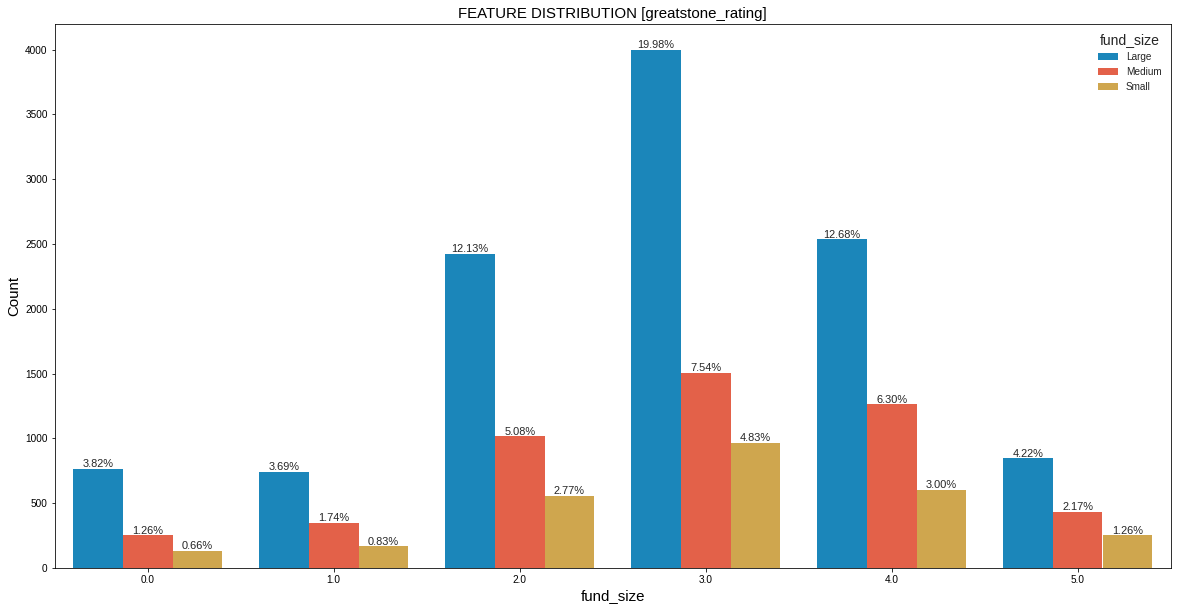

In [40]:
plt.subplots(1,1,figsize=(20,10)) 
plt.style.use('seaborn')
plt.style.use('fivethirtyeight') 
g = sns.countplot(x=data[~data.greatstone_rating.isnull()]['greatstone_rating'], data=data[~data.greatstone_rating.isnull()],hue='fund_size' )

g.set_title("FEATURE DISTRIBUTION [greatstone_rating]", fontsize = 15)
g.set_xlabel("fund_size", fontsize = 15)
g.set_ylabel("Count", fontsize = 15)

for p in g.patches:
    g.annotate('{:1.2f}%'.format(p.get_height()/len(data[~data.greatstone_rating.isnull()])*100), (p.get_x() + p.get_width() / 2.,
                p.get_height()+5),  ha = 'center', va = 'center', xytext = (0, 4), textcoords = 'offset points', fontsize=11)
   
plt.show()

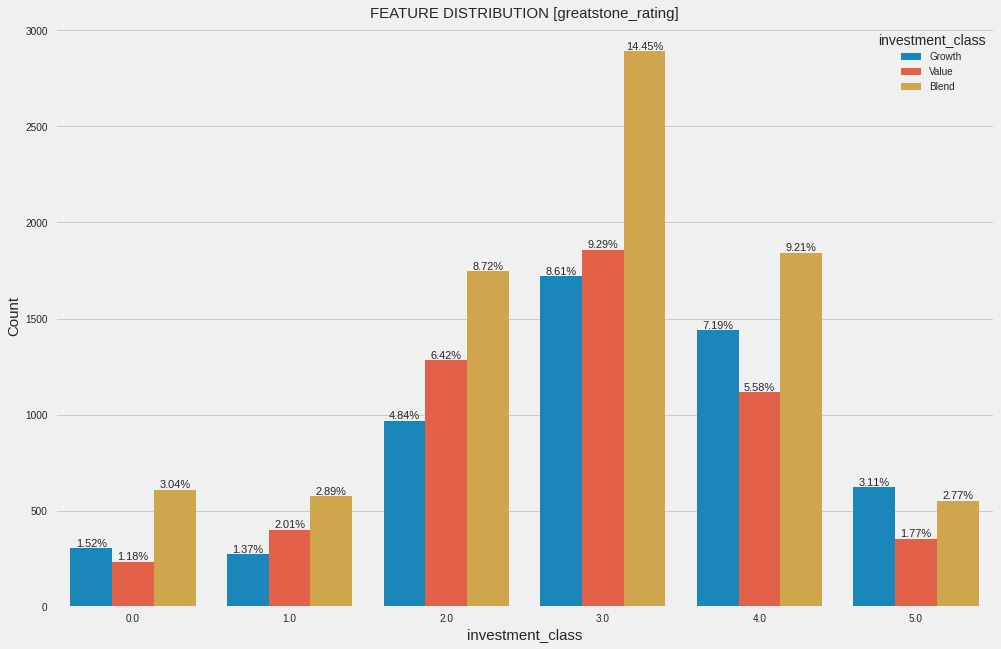

In [41]:
plt.subplots(1,1,figsize=(15,10)) 
plt.style.use('seaborn')
plt.style.use('fivethirtyeight') 
g = sns.countplot(x=data[~data.greatstone_rating.isnull()]['greatstone_rating'], data=data[~data.greatstone_rating.isnull()],hue='investment_class' )

g.set_title("FEATURE DISTRIBUTION [greatstone_rating]", fontsize = 15)
g.set_xlabel("investment_class", fontsize = 15)
g.set_ylabel("Count", fontsize = 15)

for p in g.patches:
    g.annotate('{:1.2f}%'.format(p.get_height()/len(data[~data.greatstone_rating.isnull()])*100), (p.get_x() + p.get_width() / 2.,
                p.get_height()+5),  ha = 'center', va = 'center', xytext = (0, 4), textcoords = 'offset points', fontsize=11)
   
plt.show()

In [0]:
data.investment_class.replace(np.NaN,'Blend',inplace=True)
data.fund_size.replace(np.NaN,'Large',inplace=True)

In [0]:
def clean_string(x):
    """ If the value is a string, then remove currency symbol and delimiters
    otherwise, the value is numeric and can be converted
    """
    if isinstance(x, str):
        return(x.replace(',', ''))
    return(x)


In [44]:
#data['ps_ratio'] = data['ps_ratio'].apply(clean_string).astype('float')
data['ps_ratio'] = data['ps_ratio'].apply(lambda x: float(x.replace(',', '')) if isinstance(x, str) else x).astype(float)
data['ps_ratio'] = data['ps_ratio'].astype(np.float64)
#data['ps_ratio'].fillna(np.mean(data['ps_ratio'] ),inplace=True)
# data['ps_ratio'] = data['ps_ratio'].apply(lambda x: type(x).__name__)
# data['ps_ratio'][~data['ps_ratio'].applymap(np.isreal).all(1)]
data['ps_ratio'].apply(type).value_counts()

<class 'float'>    25000
Name: ps_ratio, dtype: int64

In [45]:
#data['mmc'] = data['mmc'].apply(clean_string).astype('float')
data['mmc'] = data['mmc'].apply(lambda x: float(x.replace(',', '')) if isinstance(x, str) else x).astype(float)
data['mmc'] = data['mmc'].astype(np.float64)
#data['mmc'].fillna(np.mean(data['mmc'] ),inplace=True)
# data['mmc'] = data['mmc'].apply(lambda x: type(x).__name__)
data['mmc'].apply(type).value_counts()

<class 'float'>    25000
Name: mmc, dtype: int64

In [46]:
#data['pc_ratio'] = data['pc_ratio'].apply(clean_string).astype('float')
data['pc_ratio'] = data['pc_ratio'].apply(lambda x: float(x.replace(',', '')) if isinstance(x, str) else x).astype(float)
data['pc_ratio'] = data['pc_ratio'].astype(np.float64)
#data['pc_ratio'].fillna(np.mean(data['pc_ratio'] ),inplace=True)
# data['pc_ratio'] = data['pc_ratio'].apply(lambda x: type(x).__name__)
data['pc_ratio'].apply(type).value_counts()

<class 'float'>    25000
Name: pc_ratio, dtype: int64

In [47]:
#data['pe_ratio'] = data['pe_ratio'].apply(clean_string).astype('float')
data['pe_ratio'] = data['pe_ratio'].apply(lambda x: float(x.replace(',', '')) if isinstance(x, str) else x).astype(float)
data['pe_ratio'] = data['pe_ratio'].astype(np.float64)
#data['pe_ratio'].fillna(np.mean(data['pe_ratio'] ),inplace=True)
# data['pe_ratio'] = data['pe_ratio'].apply(lambda x: type(x).__name__)
data['pe_ratio'].apply(type).value_counts()

<class 'float'>    25000
Name: pe_ratio, dtype: int64

In [48]:
#data['10yrs_treynor_ratio_fund'] = data['10yrs_treynor_ratio_fund'].apply(clean_string).astype('float')
data['10yrs_treynor_ratio_fund'] = data['10yrs_treynor_ratio_fund'].apply(lambda x: float(x.replace(',', '')) if isinstance(x, str) else x).astype(float)
data['10yrs_treynor_ratio_fund'] = data['10yrs_treynor_ratio_fund'].astype(np.float64)
#data['10yrs_treynor_ratio_fund'].fillna(np.mean(data['10yrs_treynor_ratio_fund'] ),inplace=True)
# data['10yrs_treynor_ratio_fund'] = data['10yrs_treynor_ratio_fund'].apply(lambda x: type(x).__name__)
data['10yrs_treynor_ratio_fund'].apply(type).value_counts()

<class 'float'>    25000
Name: 10yrs_treynor_ratio_fund, dtype: int64

In [49]:
#data['3yrs_treynor_ratio_fund_type'] = data['3yrs_treynor_ratio_fund'].apply(clean_string).astype('float')
data['3yrs_treynor_ratio_fund'] = data['3yrs_treynor_ratio_fund'].apply(lambda x: float(x.replace(',', '')) if isinstance(x, str) else x).astype(float)
data['3yrs_treynor_ratio_fund'] = data['3yrs_treynor_ratio_fund'].astype(np.float64)
#data['3yrs_treynor_ratio_fund'].fillna(np.mean(data['3yrs_treynor_ratio_fund'] ),inplace=True)
# data['3yrs_treynor_ratio_fund_type'] = data['3yrs_treynor_ratio_fund'].apply(lambda x: type(x).__name__)
data['3yrs_treynor_ratio_fund'].apply(type).value_counts()

<class 'float'>    25000
Name: 3yrs_treynor_ratio_fund, dtype: int64

In [50]:
#data['5yrs_treynor_ratio_fund'] = data['5yrs_treynor_ratio_fund'].apply(clean_string).astype('float')
data['5yrs_treynor_ratio_fund'] = data['5yrs_treynor_ratio_fund'].apply(lambda x: float(x.replace(',', '')) if isinstance(x, str) else x).astype(float)
data['5yrs_treynor_ratio_fund'] = data['5yrs_treynor_ratio_fund'].astype(np.float64)
#data['5yrs_treynor_ratio_fund'].fillna(np.mean(data['5yrs_treynor_ratio_fund'] ),inplace=True)
# data['5yrs_treynor_ratio_fund'] = data['5yrs_treynor_ratio_fund'].apply(lambda x: type(x).__name__)
data['5yrs_treynor_ratio_fund'].apply(type).value_counts()

<class 'float'>    25000
Name: 5yrs_treynor_ratio_fund, dtype: int64

In [0]:
### Label encoding of col_cat 
from sklearn import preprocessing  
label_encoder = preprocessing.LabelEncoder() 
  
i=0
col_d = ['category','parent_company','fund_name','investment_class','fund_size']
for i in range(len(col_d)):
  data[col_d[i]]= label_encoder.fit_transform(data[col_d[i]]) 

In [52]:
data[col_cat].sample(3)

,category,parent_company,fund_name,ps_ratio,mmc,pc_ratio,pe_ratio,10yrs_treynor_ratio_fund,investment_class,fund_size,3yrs_treynor_ratio_fund,5yrs_treynor_ratio_fund
21464,25,451,15109,1.66,22490.99,9.17,16.07,8.00,1,0,3.49,0.54
11918,47,246,6574,1.65,134268.25,9.85,16.62,NaN,0,0,NaN,NaN
1063,81,308,9400,1.31,2670.71,6.85,15.29,12.78,0,2,8.03,4.80


In [53]:
data[col_cat].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   category                  25000 non-null  int64  
 1   parent_company            25000 non-null  int64  
 2   fund_name                 25000 non-null  int64  
 3   ps_ratio                  24886 non-null  float64
 4   mmc                       24886 non-null  float64
 5   pc_ratio                  24886 non-null  float64
 6   pe_ratio                  24886 non-null  float64
 7   10yrs_treynor_ratio_fund  16416 non-null  float64
 8   investment_class          25000 non-null  int64  
 9   fund_size                 25000 non-null  int64  
 10  3yrs_treynor_ratio_fund   23352 non-null  float64
 11  5yrs_treynor_ratio_fund   21157 non-null  float64
dtypes: float64(7), int64(5)
memory usage: 2.3 MB


In [0]:
#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ DATA CLEANSING OF CATEGORICAL COLUMNS @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

In [0]:
### Finding the number of ***UNIQUE*** values and dropping columns and rows having same unique values
i=0
col_d = col_cat
for i in range(len(col_d)):
  ## droping column wise
  unq = data[col_d[i]].nunique()
  if unq ==1:
    data.drop(columns=col_d[i],axis=1,inplace=True)   
    print("number unique values in column ,",col_d[i] ," are:-  ",unq)


i=0
row_d = data.shape[0]
for i in range(row_d):
  ## droping row wise
  unq = data.iloc[i,:].nunique()
  if unq == 1:
    data.drop(data.index[i],axis=0,inplace=True)
    print("number unique values in row index ,",i ," are:-  ",unq)


In [0]:
### Finding the columns having ***NULL*** values gretaer than the threshold and drop then column and row wise
threshold = 0.7
i=0
col_d = col_cat
for i in range(len(col_d)):
  ## droping column wise
  unq = data[col_d[i]].isnull().sum()/data.shape[0]
  if unq > threshold:
    data.drop(columns=col_d[i],axis=1,inplace=True)   
    print("number unique values in column ,",col_d[i] ," are:-  ",unq)


i=0
row_d = data.shape[0]
for i in range(row_d):
  ## droping row wise
  unq = data.iloc[i,:].isnull().sum()/data.shape[0]
  if unq > threshold:
    data.drop(data.index[i],axis=0,inplace=True)
    print("% unique values in row index ,",i ," are:-  ",unq)


In [57]:
data.shape

(25000, 91)

In [58]:
####################################### CHECKING and Removing THE highly ************ CORREALATED COLUMNS ***************** ##########################################
correlated_features = set()
correlation_matrix = data.drop(columns=['tag','id','fund_id','greatstone_rating'],axis=1).corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

print(len(correlated_features))
print(correlated_features)

data.drop(columns=correlated_features,axis=1,inplace=True)

print(data.shape)

1
{'fund_name'}
(25000, 90)


In [59]:
data.shape

(25000, 90)

In [60]:
col_int = data.drop(columns=['tag','id','fund_id','greatstone_rating'],axis=1).select_dtypes(exclude=('category','object')).columns
col_id = ['tag','id','fund_id']
col_tgt = ['greatstone_rating']
col_cat = data.drop(columns=['tag','id','fund_id','greatstone_rating'],axis=1).select_dtypes(include=('category','object')).columns
print(len(col_int)+len(col_id)+len(col_tgt)+len(col_cat))
print('col_int :- ',len(col_int),'| col_cat :-',len(col_cat),'| col_id :-',len(col_id),'| col_tgt :-',len(col_tgt))
print(col_cat)

90
col_int :-  86 | col_cat :- 0 | col_id :- 3 | col_tgt :- 1
Index([], dtype='object')


In [0]:
data_tst_ids = data[data.greatstone_rating.isnull()][['tag','id','fund_id']]

In [0]:
############################### NEGATIVE VALUES ###########################################################

### Treating the CATEGORICAL  ****** NEGATIVE ********** values  - Training 

i=0
col_d = col_int
i=0
column = []
for i in range(len(col_d)):
  data[col_d[i]]  = data[col_d[i]].apply(lambda x : x*-1 if x<0 else x)
  unq = data[col_d[i]].loc[(data[col_d[i]]<0)].count()
  #print("number negative values in column ,",col_d[i] ," are:-  ",unq)

In [0]:
### Treating the   CATEGORICAL ******* NULL********* values

i=0
col_d = col_int
for i in range(len(col_d)):
  data[col_d[i]].fillna(np.mean(data[col_d[i]]),inplace=True)
  #unq = data_train[col_d[i]].isnull().sum()  
  #print("number of null values in column ,",col_d[i] ," are:-  ",unq)

In [64]:
data[col_int].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 86 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   category                                25000 non-null  int64  
 1   parent_company                          25000 non-null  int64  
 2   fund_ratio_net_annual_expense           25000 non-null  float64
 3   pb_ratio                                25000 non-null  float64
 4   ps_ratio                                25000 non-null  float64
 5   mmc                                     25000 non-null  float64
 6   pc_ratio                                25000 non-null  float64
 7   pe_ratio                                25000 non-null  float64
 8   10years_category_r_squared              25000 non-null  float64
 9   10yrs_sharpe_ratio_fund                 25000 non-null  float64
 10  10_years_alpha_fund                     25000 non-null  fl

In [65]:
data[col_int].isnull().sum().sum()

0

In [66]:
data[col_int].shape

(25000, 86)

In [67]:
data.shape

(25000, 90)

In [68]:
col_int = data.drop(columns=['tag','id','fund_id','greatstone_rating'],axis=1).select_dtypes(exclude=('category','object')).columns
col_id = ['tag','id','fund_id']
col_tgt = ['greatstone_rating']
col_cat = data.drop(columns=['tag','id','fund_id','greatstone_rating'],axis=1).select_dtypes(include=('category','object')).columns
print(len(col_int)+len(col_id)+len(col_tgt)+len(col_cat))
print('col_int :- ',len(col_int),'| col_cat :-',len(col_cat),'| col_id :-',len(col_id),'| col_tgt :-',len(col_tgt))
print(col_cat)

90
col_int :-  86 | col_cat :- 0 | col_id :- 3 | col_tgt :- 1
Index([], dtype='object')


In [0]:
####################################################### ********* ONE HOT ENCODING [get dummeies ] OF CATEGORICAL COLUMNS ********************** ###############################

In [70]:
i=0
col_d = ['category','parent_company','investment_class','fund_size']
for i in range(len(col_d)):
  unq = data[col_d[i]].nunique()
  print("number of unique values for columns ", col_d[i] ," are:- ",unq)
  data = pd.concat([data,pd.get_dummies(data[col_d[i]], drop_first=True, prefix=col_d[i],dummy_na=False)],axis=1)
  #data.drop(columns=col_d[i],axis=1,inplace=True)

number of unique values for columns  category  are:-  111
number of unique values for columns  parent_company  are:-  761
number of unique values for columns  investment_class  are:-  3
number of unique values for columns  fund_size  are:-  3


In [71]:
####################################### CHECKING and Removing THE highly ************ CORREALATED COLUMNS ***************** ##########################################
correlated_features = set()
correlation_matrix = data.drop(columns=['tag','id','fund_id','greatstone_rating'],axis=1).corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

print(len(correlated_features))
print(correlated_features)

data.drop(columns=correlated_features,axis=1,inplace=True)

print(data.shape)

5
{'fund_size_2', 'investment_class_2', 'category_5', 'category_13', 'category_103'}
(25000, 959)


In [72]:
data.isnull().sum().sum()

5000

In [73]:
col_int = data.drop(columns=['tag','id','fund_id','greatstone_rating'],axis=1).select_dtypes(exclude=('category','object')).columns
col_id = ['tag','id','fund_id']
col_tgt = ['greatstone_rating']
col_cat = data.drop(columns=['tag','id','fund_id','greatstone_rating'],axis=1).select_dtypes(include=('category','object')).columns
print(len(col_int)+len(col_id)+len(col_tgt)+len(col_cat))
print('col_int :- ',len(col_int),'| col_cat :-',len(col_cat),'| col_id :-',len(col_id),'| col_tgt :-',len(col_tgt))
print(col_cat)

959
col_int :-  955 | col_cat :- 0 | col_id :- 3 | col_tgt :- 1
Index([], dtype='object')


In [0]:
####################################################### ******** CLASS IMBALANCE [ SMOTE ] ************ ##############################################

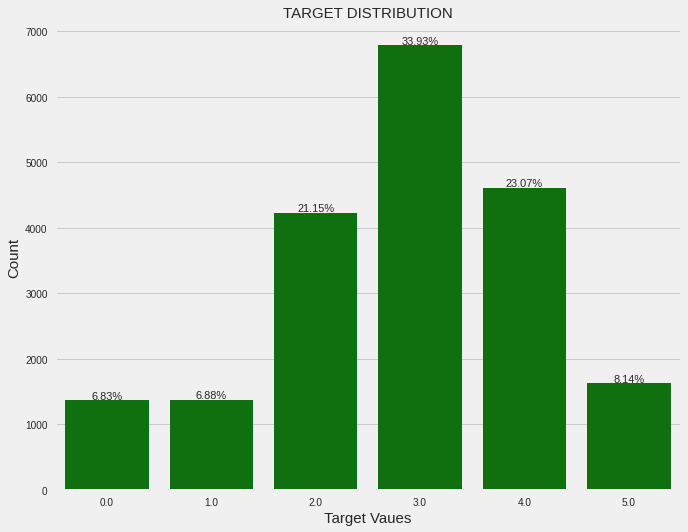

In [75]:
plt.subplots(1,1,figsize=(10,8)) 
plt.style.use('seaborn')
g = sns.countplot(x= data[~data.greatstone_rating.isnull()]['greatstone_rating'], data= data[~data.greatstone_rating.isnull()], color='green')

g.set_title("TARGET DISTRIBUTION", fontsize = 15)
g.set_xlabel("Target Vaues", fontsize = 15)
g.set_ylabel("Count", fontsize = 15)

for p in g.patches:
    g.annotate('{:1.2f}%'.format(p.get_height()/len( data[~data.greatstone_rating.isnull()])*100), (p.get_x() + p.get_width() / 2.,
                p.get_height()+5),  ha = 'center', va = 'center', xytext = (0, 4), textcoords = 'offset points', fontsize=11)
   
plt.show()

In [76]:
# Use SMOTE to oversample the minority classes
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=12)
y = data[~data.greatstone_rating.isnull()]['greatstone_rating']
X = data[~data.greatstone_rating.isnull()][col_int]  
print(X.shape)


X_sm, y_sm = sm.fit_sample(X, y)
# Count the number of occurences in the y_train sets to ensure that the oversampling worked 

print(y_sm.shape,X_sm.shape)

data_smote = pd.concat([pd.DataFrame(X_sm,columns=col_int),pd.DataFrame(y_sm,columns=['greatstone_rating'])],axis=1) #,data[~data.greatstone_rating.isnull()][col_id]
data_smote.shape


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.



(20000, 955)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.2

(40716,) (40716, 955)


(40716, 956)

In [77]:
pd.DataFrame(X_sm,columns=col_int).isnull().sum().sum()

0

In [78]:
data_smote.isnull().sum().sum()

0

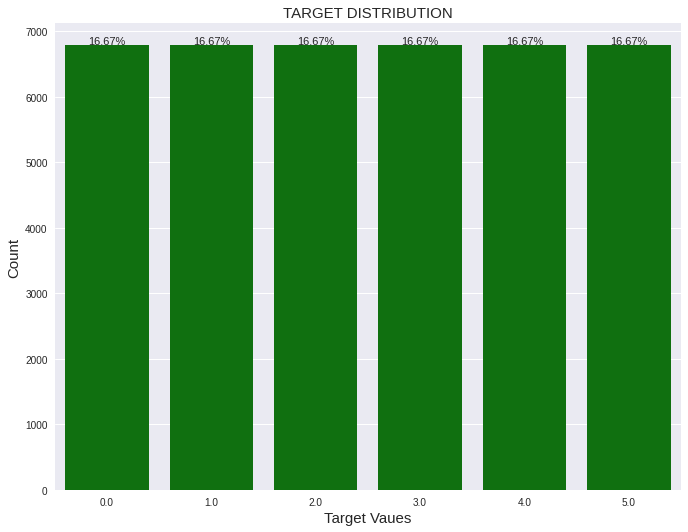

In [79]:
plt.subplots(1,1,figsize=(10,8)) 
plt.style.use('seaborn')
g = sns.countplot(x= data_smote['greatstone_rating'], data= data_smote, color='green')

g.set_title("TARGET DISTRIBUTION", fontsize = 15)
g.set_xlabel("Target Vaues", fontsize = 15)
g.set_ylabel("Count", fontsize = 15)

for p in g.patches:
    g.annotate('{:1.2f}%'.format(p.get_height()/len(data_smote)*100), (p.get_x() + p.get_width() / 2.,
                p.get_height()+5),  ha = 'center', va = 'center', xytext = (0, 4), textcoords = 'offset points', fontsize=11)
   
plt.show()

In [80]:
data[data.greatstone_rating.isnull()].drop(columns=col_id).shape

(5000, 956)

In [81]:
data = pd.concat([data_smote,data[data.greatstone_rating.isnull()].drop(columns=col_id)],axis=0)
data.shape

(45716, 956)

In [82]:
data.isnull().sum().sum()

5000

In [83]:
reduce_mem_usage(data)


Memory usage of dataframe is 333.79 MB
Memory usage after optimization is: 83.88 MB
Decreased by 74.9%


,category,parent_company,fund_ratio_net_annual_expense,pb_ratio,ps_ratio,mmc,pc_ratio,pe_ratio,10years_category_r_squared,10yrs_sharpe_ratio_fund,10_years_alpha_fund,10years_fund_std,10yrs_sharpe_ratio_category,10_years_beta_fund,10yrs_treynor_ratio_fund,10_years_return_mean_annual_category,10yrs_treynor_ratio_category,10_years_return_fund,10_years_beta_category,bb_rating,below_b_rating,others_rating,maturity_bond,a_rating,aaa_rating,aa_rating,bbb_rating,duration_bond,portfolio_communication_allocation,portfolio_financial_services,portfolio_industrials_allocation,portfolio_tech_allocation,portfolio_materials_basic_allocation,portfolio_energy_allocation,portfolio_consumer_defence_allocation,portfolio_healthcare_allocation,portfolio_property_allocation,portfolio_utils_allocation,portfolio_cyclical_consumer_allocation,investment_class,...,parent_company_724,parent_company_725,parent_company_726,parent_company_727,parent_company_728,parent_company_729,parent_company_730,parent_company_731,parent_company_732,parent_company_733,parent_company_734,parent_company_735,parent_company_736,parent_company_737,parent_company_738,parent_company_739,parent_company_740,parent_company_741,parent_company_742,parent_company_743,parent_company_744,parent_company_745,parent_company_746,parent_company_747,parent_company_748,parent_company_749,parent_company_750,parent_company_751,parent_company_752,parent_company_753,parent_company_754,parent_company_755,parent_company_756,parent_company_757,parent_company_758,parent_company_759,parent_company_760,investment_class_1,fund_size_1,greatstone_rating
0,42.0,387.0,0.580078,5.300781,3.380859,72347.031250,15.953125,18.875000,0.879883,1.160156,0.160034,14.296875,0.010002,1.080078,15.570312,0.010002,0.150024,17.250000,0.010002,0.000000,0.000000,0.000000,7.765625,0.00000,0.00000,0.000000,0.0000,4.644531,0.779785,9.773438,9.968750,35.500000,2.859375,0.379883,5.878906,14.406250,2.669922,0.389893,17.375000,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0
1,42.0,149.0,0.990234,5.398438,3.669922,68857.429688,15.968750,23.265625,0.879883,1.219727,1.000000,12.679688,0.010002,0.950195,16.578125,0.010002,0.150024,16.203125,0.010002,0.000000,0.000000,0.000000,7.765625,0.00000,0.00000,0.000000,0.0000,4.644531,4.699219,16.406250,11.453125,25.093750,8.359375,0.000000,9.421875,16.468750,1.030273,0.000000,7.089844,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0
2,43.0,372.0,0.520020,2.230469,1.629883,43266.621094,8.929688,12.703125,0.899902,1.200195,0.750000,11.210938,0.010002,0.839844,16.375000,0.010002,0.140015,14.117188,0.010002,0.000000,0.000000,0.000000,7.765625,0.00000,0.00000,0.000000,0.0000,4.644531,6.531250,13.796875,10.906250,0.160034,2.220703,6.789062,25.734375,9.000000,0.000000,19.421875,5.429688,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
3,90.0,529.0,0.750000,2.019531,1.400391,43747.898438,7.589844,14.742188,0.970215,0.937500,0.003147,11.421875,0.010002,0.963379,16.125000,0.010002,0.080017,0.000000,0.010002,0.000000,0.000000,0.000000,7.765625,0.00000,0.00000,0.000000,0.0000,4.644531,3.490234,13.953125,10.507812,19.265625,3.750000,5.109375,7.289062,12.218750,10.406250,3.070312,10.953125,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,13.0,679.0,1.900391,0.000000,0.000000,0.000000,0.000000,0.000000,0.830078,0.959961,0.649902,10.843750,0.010002,1.219727,8.437500,0.010002,0.090027,10.773438,0.010002,0.000000,0.000000,0.000000,7.765625,0.00000,0.00000,0.000000,0.0000,4.644531,0.000000,14.203125,16.765625,9.820312,15.640625,0.000000,0.000000

In [84]:
col_int = data.drop(columns=['greatstone_rating'],axis=1).select_dtypes(exclude=('category','object')).columns
col_id = ['tag','id','fund_id']
col_tgt = ['greatstone_rating']
col_cat = data.drop(columns=['greatstone_rating'],axis=1).select_dtypes(include=('category','object')).columns
print(len(col_int)+len(col_id)+len(col_tgt)+len(col_cat))
print('col_int :- ',len(col_int),'| col_cat :-',len(col_cat),'| col_id :-',len(col_id),'| col_tgt :-',len(col_tgt))
print(col_cat)

959
col_int :-  955 | col_cat :- 0 | col_id :- 3 | col_tgt :- 1
Index([], dtype='object')


In [85]:
data[col_int[:20]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45716 entries, 0 to 24999
Data columns (total 20 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   category                              45716 non-null  float16
 1   parent_company                        45716 non-null  float16
 2   fund_ratio_net_annual_expense         45716 non-null  float16
 3   pb_ratio                              45716 non-null  float16
 4   ps_ratio                              45716 non-null  float16
 5   mmc                                   45716 non-null  float32
 6   pc_ratio                              45716 non-null  float16
 7   pe_ratio                              45716 non-null  float16
 8   10years_category_r_squared            45716 non-null  float16
 9   10yrs_sharpe_ratio_fund               45716 non-null  float16
 10  10_years_alpha_fund                   45716 non-null  float16
 11  10years_fund_st

In [86]:
data.isnull().sum().sum()

5000

In [87]:
################## CHECKING and Removing THE highly   ***** CORRELATED COLUMNS ******  ###################################################
correlated_features = set()
correlation_matrix = data[col_int].corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

print(len(correlated_features))
print(correlated_features)

data.drop(columns=correlated_features,axis=1,inplace=True)

print(data.shape)

1
{'fund_beta_3years'}
(45716, 955)


In [88]:
col_int = data.drop(columns=['greatstone_rating'],axis=1).select_dtypes(exclude=('category','object')).columns
col_id = ['tag','id','fund_id']
col_tgt = ['greatstone_rating']
col_cat = data.drop(columns=['greatstone_rating'],axis=1).select_dtypes(include=('category','object')).columns
print(len(col_int)+len(col_id)+len(col_tgt)+len(col_cat))
print('col_int :- ',len(col_int),'| col_cat :-',len(col_cat),'| col_id :-',len(col_id),'| col_tgt :-',len(col_tgt))
print(col_cat)

958
col_int :-  954 | col_cat :- 0 | col_id :- 3 | col_tgt :- 1
Index([], dtype='object')


In [0]:
data.to_csv('/gdrive/My Drive/Hackathon/GREATLEARNING-APRIL/FeatureEngineering/data.csv',index=False)
data_tst_ids.to_csv('/gdrive/My Drive/Hackathon/GREATLEARNING-APRIL/FeatureSelection/data_tst_ids.csv',index=False)

In [90]:
import pytz
from datetime import datetime
# assuming now contains a timezone aware datetime
now = datetime.now()
tz = pytz.timezone('Asia/Kolkata')
your_now = now.astimezone(tz)
print (your_now)

2020-05-11 00:08:53.530734+05:30
